In [1]:
import torch
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3],[7],[11],[15]]

In [3]:
X = torch.tensor(x, dtype=torch.float)
Y = torch.tensor(y, dtype=torch.float)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X, Y = X.to(device), Y.to(device)

In [5]:
import torch.nn as nn

In [91]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden = nn.Linear(2, 8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_2_output = nn.Linear(8, 1)

    def forward(self, x):
        s = self.input_to_hidden(x)
        h = self.hidden_layer_activation(s)
        o = self.hidden_2_output(h)
        return o,h
        

In [7]:
net = MyNeuralNet()
net = net.to(device)

In [8]:
net.input_to_hidden.weight.shape

torch.Size([8, 2])

In [10]:
X.dtype

torch.float32

In [11]:
Y_ = net(X) 
lossfn = nn.MSELoss()
loss = lossfn(Y_, Y)
print(loss)

tensor(93.7110, grad_fn=<MseLossBackward>)


In [12]:
from torch.optim import SGD

In [13]:
sgd = SGD(net.parameters(), lr=0.001)

In [17]:
sgd.zero_grad()
loss = lossfn(net(X), Y)
loss.backward()
sgd.step()


In [ ]:
loss_history = []
for i in range(50):
    sgd.zero_grad()
    loss = lossfn(net(X), Y)
    loss.backward()
    sgd.step()
    loss_history.append(loss)
    print('.')

Text(0, 0.5, 'training loss')

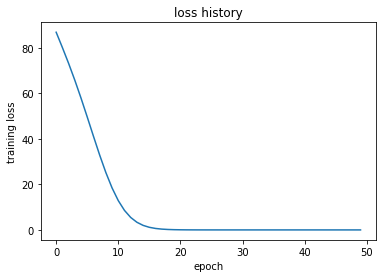

In [21]:
plt.plot([loss.detach() for loss in loss_history])
plt.title('loss history')
plt.xlabel('epoch')
plt.ylabel('training loss')

In [23]:
a = loss_history[-1]

In [30]:
a.item()

0.009439594112336636

In [15]:
from torch.utils.data import Dataset, DataLoader

In [16]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.x)

    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]


In [17]:
ds = MyDataset(x, y)

In [18]:
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [65]:
net = MyNeuralNet()
opt = SGD(net.parameters(), lr=0.001)
loss_history = []
for epoch in range(100):
    print('.',end='')
    for x, y in dl:
        opt.zero_grad()
        loss = lossfn(net(x), y)
        loss.backward()
        opt.step()
        loss_history.append(loss.item())


....................................................................................................

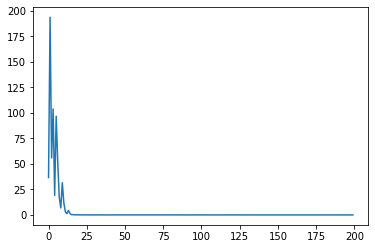

In [66]:
plt.plot(loss_history)

In [67]:
loss_history[-1]

0.011270683258771896

In [68]:
val_x = [[10, 11]]
val_x = torch.tensor(val_x).float()

In [69]:
net(val_x)

tensor([[21.0482]], grad_fn=<AddmmBackward>)

In [75]:
def my_mse_loss(yp, y):
    return ((yp - y).abs()).mean()

In [10]:
net = MyNeuralNet()
opt = SGD(net.parameters(), lr=0.001, momentum=0.9)
loss_history = []
for epoch in range(200):
    if epoch == 100:
        opt = SGD(net.parameters(), lr=0.0001, momentum=0.9)
    print('.',end='')
    for x, y in dl:
        opt.zero_grad()
        loss = my_mse_loss(net(x)[0], y)
        loss.backward()
        opt.step()
        loss_history.append(loss.item())
plt.plot(loss_history)
print(loss_history[-1])

NameError: name 'MyNeuralNet' is not defined

0.009711265563964844


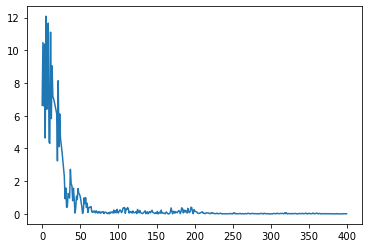

In [94]:
plt.plot(loss_history)
print(loss_history[-1])

In [86]:
h1 = net.input_to_hidden(X)
a1 = net.hidden_layer_activation(h1)

In [87]:
a1

tensor([[ 0.0000,  2.3297,  0.0000,  0.0000,  0.2540,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  5.6882,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  9.0466,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000, 12.4050,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]],
       grad_fn=<ReluBackward0>)

In [96]:
print(net)

MyNeuralNet(
  (input_to_hidden): Linear(in_features=2, out_features=8, bias=True)
  (hidden_layer_activation): ReLU()
  (hidden_2_output): Linear(in_features=8, out_features=1, bias=True)
)


In [98]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)


In [21]:
from torch import nn
from torch.optim import SGD
lossfn = torch.nn.MSELoss()
net =  nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)
opt = torch.optim.Adam(net.parameters(), lr=0.001)
loss_history = []
for epoch in range(300):
    if epoch == 100:
        opt = SGD(net.parameters(), lr=0.0001)
    if epoch == 200:
        opt = SGD(net.parameters(), lr=0.00001)
    print('.',end='')
    for x, y in dl:
        opt.zero_grad()
        loss = lossfn(net(x), y)
        loss.backward()
        opt.step()
        loss_history.append(loss.item())

............................................................................................................................................................................................................................................................................................................

0.051730215549468994


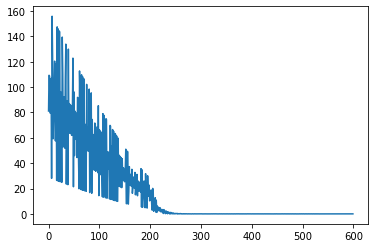

In [22]:
plt.plot(loss_history)
print(loss_history[-1])

In [23]:
from torchsummary import summary

In [26]:
print(summary(net, ))

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            24
├─ReLU: 1-2                              --
├─Linear: 1-3                            9
Total params: 33
Trainable params: 33
Non-trainable params: 0


In [133]:
validation = torch.tensor([[800,900], [1100,1000], [-111.5, -222.7]])

In [134]:
yp = net(validation)

In [145]:
net.train()

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [180]:
import pickle
def load_cifar_batch(fname):
    with open(fname, 'rb') as ins:
        raw = pickle.load(ins, encoding='bytes')
        return raw

In [181]:
data = load_cifar_batch('data/cifar-10-batches-py/data_batch_1')

In [158]:
imgs = data[b'data'].reshape((10000, 3, 32, 32))

In [161]:
imgs = torch.tensor(imgs)
imgs

tensor([[[[ 59,  43,  50,  ..., 158, 152, 148],
          [ 16,   0,  18,  ..., 123, 119, 122],
          [ 25,  16,  49,  ..., 118, 120, 109],
          ...,
          [208, 201, 198,  ..., 160,  56,  53],
          [180, 173, 186,  ..., 184,  97,  83],
          [177, 168, 179,  ..., 216, 151, 123]],

         [[ 62,  46,  48,  ..., 132, 125, 124],
          [ 20,   0,   8,  ...,  88,  83,  87],
          [ 24,   7,  27,  ...,  84,  84,  73],
          ...,
          [170, 153, 161,  ..., 133,  31,  34],
          [139, 123, 144,  ..., 148,  62,  53],
          [144, 129, 142,  ..., 184, 118,  92]],

         [[ 63,  45,  43,  ..., 108, 102, 103],
          [ 20,   0,   0,  ...,  55,  50,  57],
          [ 21,   0,   8,  ...,  50,  50,  42],
          ...,
          [ 96,  34,  26,  ...,  70,   7,  20],
          [ 96,  42,  30,  ...,  94,  34,  34],
          [116,  94,  87,  ..., 140,  84,  72]]],


        [[[154, 126, 105,  ...,  91,  87,  79],
          [140, 145, 125,  ...,  96

b'cat'


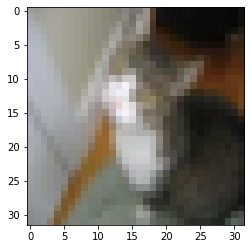

In [174]:
i = 101
plt.imshow(imgs[i].permute(1,2,0))
print(label_names[b'label_names'][data[b'labels'][i]])

In [169]:
print(data.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [182]:
def load_label_names(fname):
    with open(fname, 'rb') as inf:
        label_names = pickle.load(inf, encoding='bytes')
        return label_names

In [183]:
label_names = load_label_names('data/cifar-10-batches-py/batches.meta')

In [191]:
print(data.keys())

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [197]:
labels = torch.tensor(data[b'labels']).unsqueeze(1)


In [201]:
imgs = torch.tensor(data[b'data'] / 255).float().reshape((-1, 3, 32, 32))

In [204]:
imgs.shape


torch.Size([10000, 3, 32, 32])

In [205]:
imgs

tensor([[[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ..., 0

In [3]:
import cifar

In [4]:
data = cifar.CifarDataset('./data/cifar-10-batches-py')

In [6]:
data.train_y[1]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

automobile


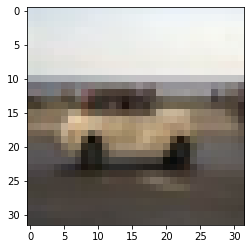

In [9]:
i = 201
plt.imshow(data.test_x[i].permute(1,2,0))
print(data.label_names[data.test_y[i].argmax()])

In [225]:

data.test_y[1]

tensor([8])

In [229]:
data.train_y[1]

tensor([9])

In [242]:
data.train_y

tensor([[6],
        [9],
        [9],
        ...,
        [9],
        [1],
        [1]])

In [239]:
a = torch.zeros((50000, 10))
a[:, data.train_y] = 1

In [240]:
a.shape

torch.Size([50000, 10])

In [241]:
a

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [29]:
net(torch.tensor([[11.,12.]]))

tensor([[22.5275]], grad_fn=<AddmmBackward>)

In [30]:
net.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0141,  0.6421],
                      [-0.7316,  0.0668],
                      [ 0.5830,  0.2046],
                      [-0.2611, -0.4389],
                      [-0.5675, -0.1416],
                      [ 0.2320,  0.2408],
                      [ 0.9132,  0.9189],
                      [ 0.5661,  0.8719]])),
             ('0.bias',
              tensor([-0.3700,  0.5833,  0.5175,  0.0419, -0.0179,  0.4975,  0.8069, -0.2632])),
             ('2.weight',
              tensor([[ 0.3720, -0.1333,  0.0484,  0.0632, -0.1121,  0.4235,  0.4809,  0.3874]])),
             ('2.bias', tensor([-0.1137]))])

In [36]:
torch.save(net.to('cpu').state_dict(), 'testm.pth')

In [42]:
net2 = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8,1),
    nn.Linear(1,1)
)

In [38]:
state_dict = torch.load('testm.pth')

In [44]:
state_dict.setdefault(1.0)

In [45]:
net2.load_state_dict(state_dict)

AttributeError: 'float' object has no attribute 'startswith'

In [41]:
net2(torch.tensor([[11.,12.]]))

tensor([[22.5275]], grad_fn=<AddmmBackward>)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3,3)),
    nn.
)